In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import files
import io
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/sample_data/DSI_kickstarterscrape_dataset.csv',encoding='cp850')

#uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# preprocessing stage of data
#df = pd.read_csv(io.BytesIO(uploaded["DSI_kickstarterscrape_dataset.csv"]),encoding='cp850') 
print(df.columns)
collist= [x for x in df.columns]
df.head()

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')


,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [ ]:
df.info()
df.isna ().any () 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   project id         45957 non-null  int64  
 1   name               45957 non-null  object 
 2   url                45957 non-null  object 
 3   category           45957 non-null  object 
 4   subcategory        45957 non-null  object 
 5   location           44635 non-null  object 
 6   status             45957 non-null  object 
 7   goal               45957 non-null  float64
 8   pledged            45945 non-null  float64
 9   funded percentage  45957 non-null  float64
 10  backers            45957 non-null  int64  
 11  funded date        45957 non-null  object 
 12  levels             45957 non-null  int64  
 13  reward levels      45898 non-null  object 
 14  updates            45957 non-null  int64  
 15  comments           45957 non-null  int64  
 16  duration           459

project id           False
name                 False
url                  False
category             False
subcategory          False
location              True
status               False
goal                 False
pledged               True
funded percentage    False
backers              False
funded date          False
levels               False
reward levels         True
updates              False
comments             False
duration             False
dtype: bool

In [ ]:
df.fillna(0)
print(df ['pledged'].sum (axis=0)/len(df['pledged']))

4979.449137236982


39.995546924297706

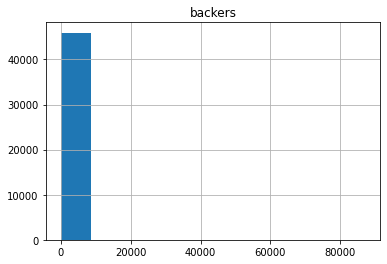

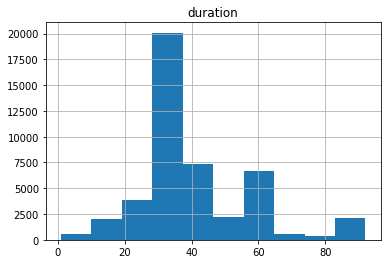

In [ ]:
df.hist(column='backers') 
df.hist(column='duration') 
df['duration'].mean(axis=0)



## As we see above, the mean of duration variable is very near 40, but most of the duration values (median) is not near 40 , that implies the variable duration is not normally distributed:



---






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   project id         45957 non-null  int64  
 1   name               45957 non-null  object 
 2   url                45957 non-null  object 
 3   category           45957 non-null  object 
 4   subcategory        45957 non-null  object 
 5   location           44635 non-null  object 
 6   status             45957 non-null  object 
 7   goal               45957 non-null  float64
 8   pledged            45945 non-null  float64
 9   funded percentage  45957 non-null  float64
 10  backers            45957 non-null  int64  
 11  funded date        45957 non-null  object 
 12  levels             45957 non-null  int64  
 13  reward levels      45898 non-null  object 
 14  updates            45957 non-null  int64  
 15  comments           45957 non-null  int64  
 16  duration           459

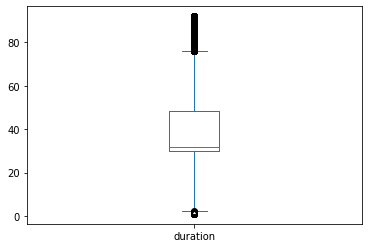

In [ ]:
df['duration'].plot(kind = 'box')
df.info()

In [ ]:

df.head(2)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18


In [ ]:
#@title Default title text
# making boolean series for a team name
ideal_length = df["status"]=="successful"
ideal_fund = df["funded percentage"] >= 1.0
# filtering data on basis of both filters
#data.where(filter1 & filter2, inplace = True)
#ideal_length = ideal_length.sort_values('duration', ascending=False) # sort by duration 
# filtering data on basis of both filters
ideal = df.where(ideal_length&ideal_fund).dropna().sort_values('duration', ascending=False).groupby(by="duration", sort=False,as_index=True)
#dict_key = dict(ideal.groups)
#new_dict = []
#values = []
#l = []
df['funded percentage']= df['funded percentage'].round(2)
ideal_backers = df.where(ideal_length&ideal_fund).dropna().groupby(by=['backers','funded percentage'],sort=False,as_index=True).size()
l1 = sorted(ideal_backers.iteritems(), key = lambda x: x[1],reverse=True)
print("The top 3 backers and funded_percentage combination around for campaigning is ")
for i in l1[:3]:
  print(i[0],i[1])
print(ideal_backers)

ideal_backers1 = df.where(ideal_length&ideal_fund).dropna().groupby(by=['funded percentage','backers'],sort=False,as_index=True).size()
l1 = sorted(ideal_backers1.iteritems(), key = lambda x: x[1],reverse=True)
print("The top 3 funded_percentage and backers combination  around for campaigning is ")
for i in l1[:3]:
  print(i[0],i[1])
print(ideal_backers1)


ideal_backers2 = df.where(ideal_length&ideal_fund).dropna().groupby(by=['funded percentage'],sort=False,as_index=True).size()
l1 = sorted(ideal_backers2.iteritems(), key = lambda x: x[1],reverse=True)
print("The top 3 percentage alone around for campaigning is ")
for i in l1[:3]:
  print(i[0])
print(ideal_backers2)

ideal_backers3 = df.where(ideal_length&ideal_fund).dropna().groupby(by=['backers'],sort=False,as_index=True).size()
l1 = sorted(ideal_backers3.iteritems(), key = lambda x: x[1],reverse=True)
print("The top 3 backers alone around for campaigning is ")
for i in l1[:3]:
  print(i[0])   

#for k,v in zip(dict_key.keys(),dict_key.values()):
#    l.append(int(k))
#    values.append(v)
#for i,x in enumerate(dict_key):
#   new_dict.append((l[i],values[i]))
#dict_proc = dict(new_dict)
#print(dict_proc)
#l1 = []
#for x,y in zip(dict_proc.keys(),dict_proc.values()):
#  l1.append((x,len(y)))
#print(l1)
id = ideal.size()
#for x in id.iteritems():
#   print(x)
duration = id.to_frame(name= 'frequency').reset_index()
print(duration)
l1 = sorted(id.iteritems(), key = lambda x: x[1],reverse=True)
print("The top 3 ideal duration for campaigning is ")
for i in l1[:3]:
  print(i[0])


  

#l2=dict(l2)

#df.where(filte1 & filter2, inplace = True)
  
#

The top 3 backers and funded_percentage combination around for campaigning is 
(12.0, 1.0) 48
(18.0, 1.0) 47
(16.0, 1.0) 46
backers  funded percentage
66.0     1.10                  6
100.0    1.09                  3
39.0     1.02                 14
46.0     1.09                  4
30.0     1.12                  6
                              ..
107.0    1.70                  2
134.0    1.33                  1
551.0    1.25                  1
119.0    1.26                  1
16.0     4.42                  1
Length: 9873, dtype: int64
The top 3 funded_percentage and backers combination  around for campaigning is 
(1.0, 12.0) 48
(1.0, 18.0) 47
(1.0, 16.0) 46
funded percentage  backers
1.10               66.0        6
1.09               100.0       3
1.02               39.0       14
1.09               46.0        4
1.12               30.0        6
                              ..
1.70               107.0       2
1.33               134.0       1
1.25               551.0       1
1.26      

[30.0, 60.0, 45.0]
[5041, 908, 788]


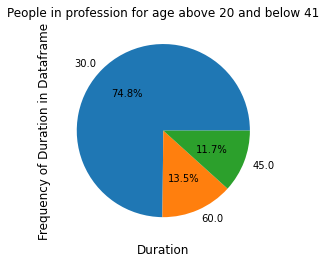

duration
45.0    141.784264
Name: backers, dtype: float64 duration
60.0    161.44163
Name: backers, dtype: float64


In [ ]:
ideal = df.where(ideal_length&ideal_fund).dropna().sort_values('duration', ascending=False)
#dict_key = dict(ideal.groups)

Duration = [l[0] for l in l1[:3]]
Duration_Frequency = [l[1] for l in l1[:3]]
print(Duration)
print(Duration_Frequency)
fig, ax = plt.subplots()
rects1 = ax.bar(Duration, Duration_Frequency, color=['burlywood', 'Chocolate', 'coral', 'cornflowerblue'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency of Duration in Dataframe', fontsize=12)
ax.set_xlabel('Duration', fontsize=12)
ax.set_title('Total frequency count in different duration', fontsize=12)
ax.set_xticks(Duration)
ax.set_xticklabels(Duration)
#ax.barh(Duration_Frequency, width=100)
ax.set_yticks(Duration_Frequency)
#ax.bar_label(rects1,label_type='center')
fig.tight_layout()
fig.savefig('Histogram_of_Duration', dpi=200)
plt.pie(Duration_Frequency, labels = Duration , autopct='%1.1f%%')
plt.title("Duration distribution in dataset")
plt.show()


id_d1 = ideal.groupby(by="duration",sort=False,as_index=True).mean()
ide = pd.Series(id_d1["backers"])
fund_ide = pd.Series(id_d1["funded percentage"])
goal1 = ide.where(ide.index == 45.0).dropna()
goal2 = ide.where(ide.index == 60.0).dropna()
print(goal1,goal2)
plt.show()

The top 3 ideal month around for launching the successful campaign is 
March (3, 2989)
April (4, 2697)
February (2, 2488)
The top 3 hours to be successfully funded are as follows
['March', 'April', 'February']
[2989, 2697, 2488]


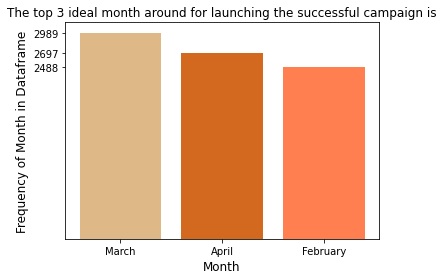

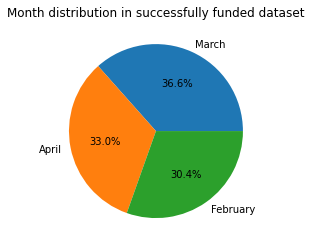

(3, 2394)
(4, 2128)
(16, 1200)


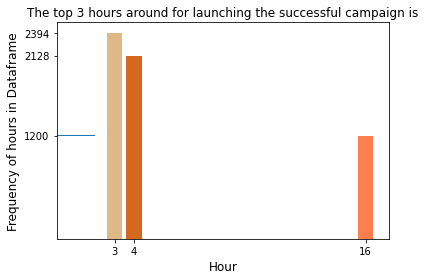

The top 3 days to be successfully funded are as follows
(2, 919)
(3, 852)
(1, 829)


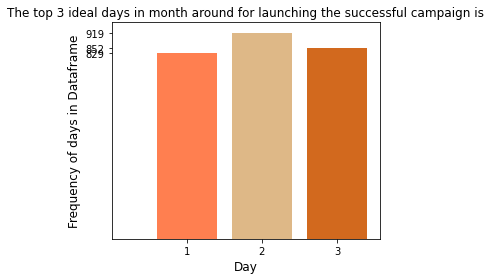

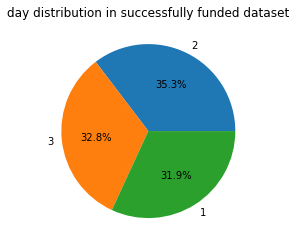

day_start
3    93.833333
Name: backers, dtype: float64 day_start
2    113.078346
Name: backers, dtype: float64
day_start
3    1.50027
Name: funded percentage, dtype: float64 day_start
2    1.478455
Name: funded percentage, dtype: float64


In [ ]:
from pandas._libs.tslibs.nattype import NaT
from datetime import datetime, timedelta
z = []
# group by both funded percentage and backers and see # multiindex
ideal_time_start = df["status"]=="successful"
ideal_fund = df["funded percentage"] >= 1.0
# filtering data on basis of both filters
#data.where(filter1 & filter2, inplace = True)
#ideal_length = ideal_length.sort_values('duration', ascending=False) # sort by duration 
# filtering data on basis of both filters
df1 = df.where(ideal_time_start & ideal_fund).dropna()

for i,x in enumerate(df1['funded date']):
 
  z.append(pd.to_datetime(str(x)[0:25], format='%a, %d %b %Y %X'))
    
df1['funded_date'] = z
# Using current time
  

# Some another datetime
exact_start =[]
for i,(x,x1) in enumerate(zip(df1['funded_date'],df1['duration'])):
  
  dur = int(x1)
  

  exact_start.append(x -  timedelta(days = dur))

df1['exact_start_time'] = exact_start

l2 = dict({(1 ,"January"),(2,"February"),(3,"March"),(4,"April"),(5,"May"),(6,"June")})

df1['month_start'] = df1['exact_start_time'].dt.month
df1['day_start'] = df1['exact_start_time'].dt.day
df1['hour_start'] = df1['exact_start_time'].dt.hour


id_m = df1.groupby(by=["month_start"],sort=False,as_index=True).size()
id_d = df1.groupby(by="day_start",sort=False,as_index=True).size()
id_d1 = df1.groupby(by="day_start",sort=False,as_index=True).mean()
id_h = df1.groupby(by="hour_start",sort=False,as_index=True).size()
#groupby(by="duration", sort=False,as_index=True)
print("The top 3 ideal month around for launching the successful campaign is ")
l1 = sorted(id_m.iteritems(), key = lambda x: x[1],reverse=True)
for l in l1[:3]:
  print(l2.get(l[0]),l )
print("The top 3 hours to be successfully funded are as follows")
Month = [l2.get(l[0]) for l in l1[:3]]
Month_Frequency = [l[1] for l in l1[:3]]
print(Month)
print(Month_Frequency)
fig, ax = plt.subplots()
rects1 = ax.bar(Month,Month_Frequency, color=['burlywood', 'Chocolate', 'coral', 'cornflowerblue'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency of Month in Dataframe', fontsize=12)
ax.set_xlabel('Month', fontsize=12)
ax.set_title('The top 3 ideal month around for launching the successful campaign is', fontsize=12)
ax.set_xticks(Month)
ax.set_xticklabels(Month)
ax.barh(Month_Frequency,width=2, label= rects1)
ax.set_yticks(Month_Frequency)
#ax.bar_label(rects1,label_type='center')
fig.tight_layout()
fig.savefig('Histogram_of_Duration', dpi=200)
plt.show()

plt.pie(Month_Frequency, labels = Month , autopct='%1.1f%%')
plt.title("Month distribution in successfully funded dataset")
plt.show()


l1 = sorted(id_h.iteritems(), key = lambda x: x[1],reverse=True)
for l in l1[:3]:
  print(l )    

hour = [l[0] for l in l1[:3]]
hour_Frequency = [l[1] for l in l1[:3]]

fig, ax = plt.subplots()
rects1 = ax.bar(hour,hour_Frequency, color=['burlywood', 'Chocolate', 'coral', 'cornflowerblue'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency of hours in Dataframe', fontsize=12)
ax.set_xlabel('Hour', fontsize=12)
ax.set_title('The top 3 hours around for launching the successful campaign is', fontsize=12)
ax.set_xticks(hour)
ax.set_xticklabels(hour)
ax.barh(hour_Frequency,width=2, label= rects1)
ax.set_yticks(hour_Frequency)

#ax.bar_label(rects1,label_type='center')
fig.tight_layout()
fig.savefig('Histogram_of_Duration', dpi=200)
plt.show()


print("The top 3 days to be successfully funded are as follows")
l1 = sorted(id_d.iteritems(), key = lambda x: x[1],reverse=True)
for l in l1[:3]:
  print(l )    

day = [l[0] for l in l1[:3]]
day_Frequency = [l[1] for l in l1[:3]]

fig, ax = plt.subplots()
rects1 = ax.bar(day,day_Frequency, color=['burlywood', 'Chocolate', 'coral', 'cornflowerblue'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency of days in Dataframe', fontsize=12)
ax.set_xlabel('Day', fontsize=12)
ax.set_title('The top 3 ideal days in month around for launching the successful campaign is', fontsize=12)
ax.set_xticks(day)
ax.set_xticklabels(day)
ax.barh(day_Frequency,width=2, label= rects1)
ax.set_yticks(day_Frequency)
ax.bar
#ax.bar_label(rects1,label_type='center')
fig.tight_layout()
fig.savefig('Histogram_of_Duration', dpi=200)
plt.show()


plt.pie(day_Frequency, labels = day , autopct='%1.1f%%')
plt.title("day distribution in successfully funded dataset")
plt.show()





ide = pd.Series(id_d1["backers"])
fund_ide = pd.Series(id_d1["funded percentage"])
goal1 = ide.where(ide.index == 3).dropna()
goal2 = ide.where(ide.index == 2).dropna()
print(goal1,goal2)

goal1 = fund_ide.where(fund_ide.index == 3).dropna()
goal2 = fund_ide.where(fund_ide.index == 2).dropna()
print(goal1,goal2)
#pd.to_datetime(df['funded date'][0:25], format='%a, %d %b %Y %X')

In [ ]:
len("Fri, 19 Aug 2011 19:28:17")
dt = pd.to_datetime(str(df['funded date'][0])[0:25], format='%a, %d %b %Y %X')

In [ ]:
print("The ideal pledge goal")
ideal_time_start = df["status"]=="successful"
ideal_fund = df["funded percentage"] >= 1.0
df1 = df.where(ideal_time_start & ideal_fund).dropna()
id_goal = df1.groupby(by="goal",sort=False,as_index=True).mean()
id_goal["backers"]
goal = pd.Series(id_goal["backers"])
fund_goal = pd.Series(id_goal["funded percentage"])
goal3 = goal.where(goal.index == 5000.0).dropna()
goal1 = goal.where(goal.index == 2000.0).dropna()
goal2 = goal.where(goal.index == 3000.0).dropna()
print(goal3,goal1,goal2)
goal3 = fund_goal.where(fund_goal.index == 5000.0).dropna()
goal1 = fund_goal.where(fund_goal.index == 2000.0).dropna()
goal2 = fund_goal.where(fund_goal.index == 3000.0).dropna()
print(goal3,goal1,goal2)

#.where(5000.0)))
#print(id_goal.filter(index=5000.0))
id_goal = df1.groupby(by="goal",sort=False,as_index=True).size()
l1 = sorted(id_goal.iteritems(), key = lambda x: x[1],reverse=True)
for l in l1[:3]:
  print(l )    



The ideal pledge goal
goal
5000.0    90.255544
Name: backers, dtype: float64 goal
2000.0    51.433912
Name: backers, dtype: float64 goal
3000.0    72.234043
Name: backers, dtype: float64
goal
5000.0    1.261235
Name: funded percentage, dtype: float64 goal
2000.0    1.329306
Name: funded percentage, dtype: float64 goal
3000.0    1.419589
Name: funded percentage, dtype: float64
(5000.0, 947)
(2000.0, 749)
(1000.0, 713)


['5000.0', '2000.0', '1000.0'] [947, 749, 713]


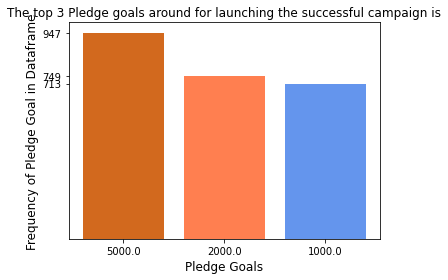

In [ ]:
goal= [str(l[0]) for l in l1[:3]]
goal_Frequency = [int(l[1]) for l in l1[:3]]

print(goal,goal_Frequency )
fig, ax = plt.subplots()
rects1 = ax.bar(goal,goal_Frequency, color=['Chocolate', 'coral', 'cornflowerblue'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency of Pledge Goal in Dataframe', fontsize=12)
ax.set_xlabel('Pledge Goals', fontsize=12)
ax.set_title('The top 3 Pledge goals around for launching the successful campaign is', fontsize=12)
ax.set_xticks(goal)
ax.set_xticklabels(goal)
#ax.barh(goal_Frequency,width="100")
ax.set_yticks(goal_Frequency)
ax.set_yticklabels(goal_Frequency)
#ax.barh(goal_Frequency,width= '20')
fig.tight_layout()
#fig.savefig('Histogram_of_Duration', dpi=200)
plt.show()

#print(id_goal["backers"])

What type of projects would be most successful in getting funded
('Music', 3286)
('Film &amp; Video', 2806)
('Art', 990)


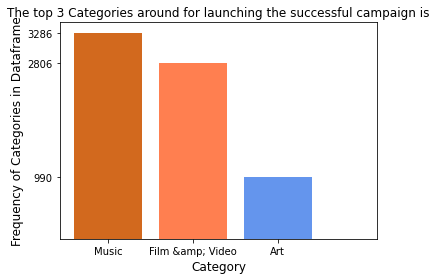

In [ ]:
print("What type of projects would be most successful in getting funded")
ideal_time_start = df["status"]=="successful"
ideal_fund = df["funded percentage"] >= 1.0
id_goal = df1.groupby(by="category",sort=False,as_index=True).size()
l1 = sorted(id_goal.iteritems(), key = lambda x: x[1],reverse=True)
for l in l1[:3]:
  print(l)
goal= [l[0] for l in l1[:3]]
goal_Frequency = [l[1] for l in l1[:3]]

fig, ax = plt.subplots()
rects1 = ax.bar(goal,goal_Frequency, color=['Chocolate', 'coral', 'cornflowerblue'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency of Categories in Dataframe', fontsize=12)
ax.set_xlabel('Category', fontsize=12)
ax.set_title('The top 3 Categories around for launching the successful campaign is', fontsize=12)
ax.set_xticks(goal)
ax.set_xticklabels(goal)
ax.barh(goal_Frequency,width="100", label=rects1)
ax.set_yticks(goal_Frequency)

#ax.bar_label(rects1,label_type='center')
fig.tight_layout()
#fig.savefig('Histogram_of_Duration', dpi=200)
plt.show()